In [63]:
%matplotlib notebook

In [130]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import pandas as pd
import statistics as stats
import matplotlib
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
# Inspect columns
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
june_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()

june_precip

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [10]:
# June precipitation into a DF
june_precip_df = pd.DataFrame(june_precip, columns=['date', 'precipitation'])
june_precip_df

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [12]:
# Show summary stats for june precipitation
june_precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [33]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
dec_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==12).all()

dec_precip

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [74]:
# To DF, then show summary stats
dec_precip_df = pd.DataFrame(dec_precip, columns=['date', 'precipitation'])

dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [103]:
# Create a list for june precipitation without showing dates, then use stats module to find mode
june_just_precipitation = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()

stats.mode(june_just_precipitation)

(0.0)

In [75]:
# Create list showing only preciptation values for december and get mode.
dec_just_precipitation = session.query(Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()

stats.mode(dec_just_precipitation)

(0.0)

In [104]:
# Mode for June temps
june_just_temps = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all()

stats.mode(june_just_temps)

(76.0)

In [105]:
# Mode for Dec temps
dec_just_temps = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

stats.mode(dec_just_temps)

(71.0)

In [113]:
# Unravel temperature data to prepare for plotting
june_unravel = list(np.ravel(june_just_temps))
dec_unravel = list(np.ravel(dec_just_temps))

<IPython.core.display.Javascript object>


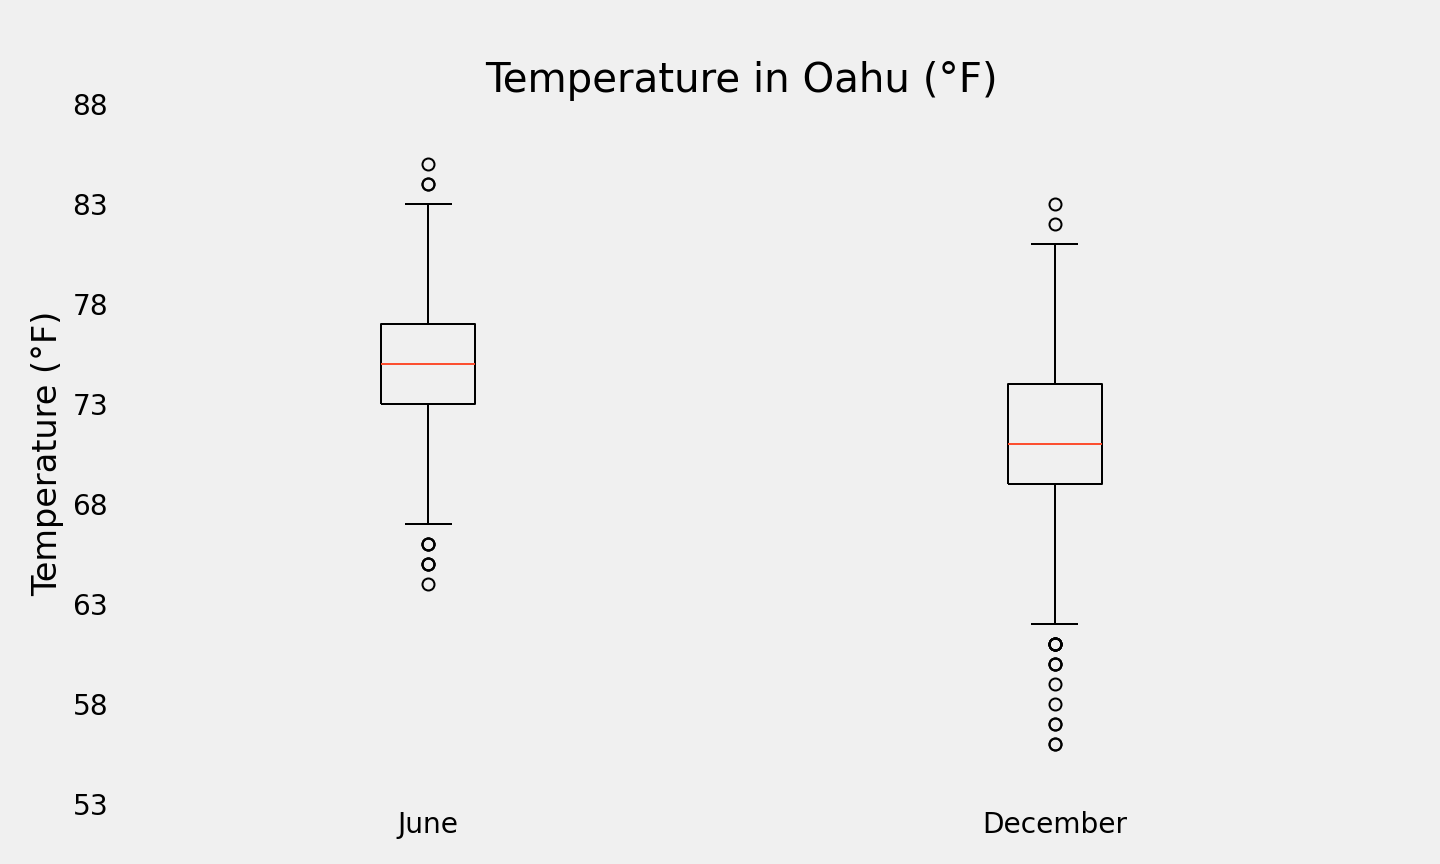

In [127]:
# Plot Temperature Data in box-and-whisker
x_labels = ["June", "December"]
temp_data = [june_unravel, dec_unravel]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Temperature in Oahu (°F)")
ax.set_ylabel("Temperature (°F)")
ax.boxplot(temp_data, labels=x_labels)
ax.set_yticks(np.arange(53, 90, step=5.0))
ax.grid()
plt.savefig("additional_analysis/Fig1_Oahu_temp.png")
plt.show()